In [45]:
from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.error_calculator import SquaredErrorCalculator
from HW2.optimization import RMSPropOptimization, NesterovOptimization
from HW2.regression_generator import generate_regression
from HW2.sgd import minibatch_gd, normalised_mini
from HW2.visualization import visualize_regression_point, visualize_line
import numpy as np

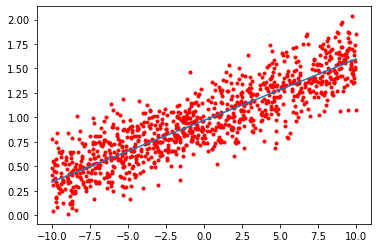

In [46]:
f, points = generate_regression(point_count=1000, y_scale=0.2)

visualize_regression_point(f, points)

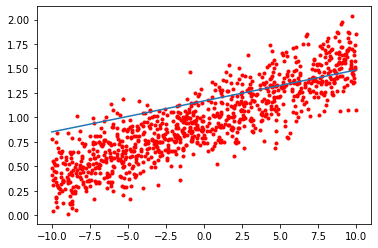

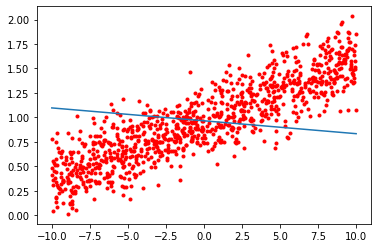

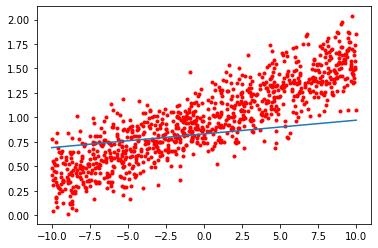

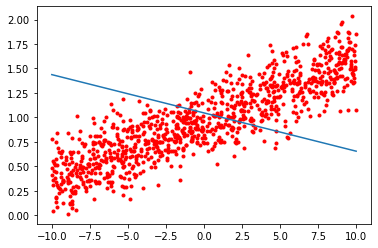

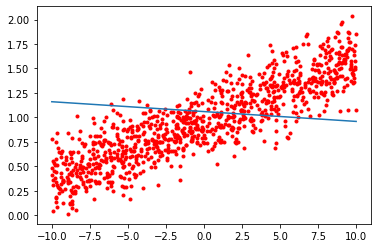

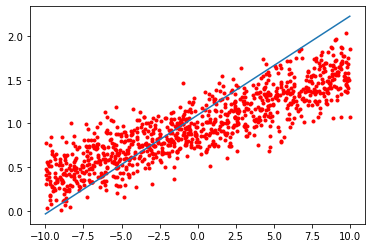

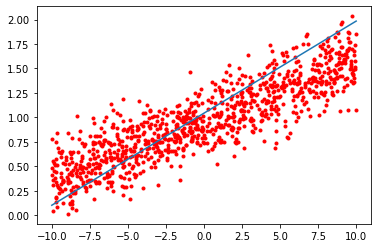

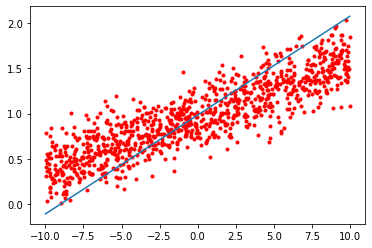

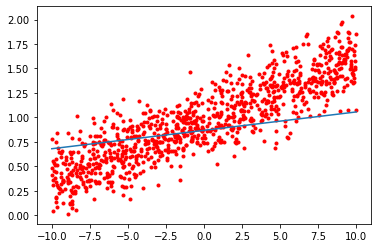

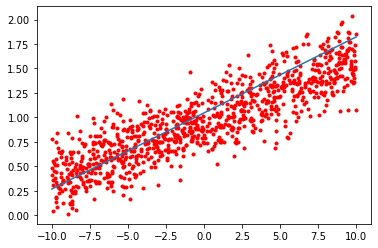

In [47]:
storage = BenchmarkStorage()
index = storage.add_benchmark_config()
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)


In [48]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', False, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.47815509999999994
	Mean memory:0.0B
	Mean SMAPE value:0.18385119854733892



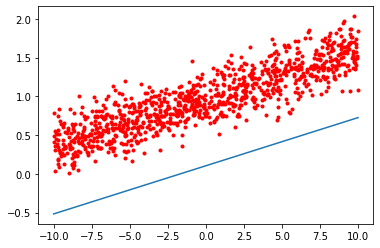

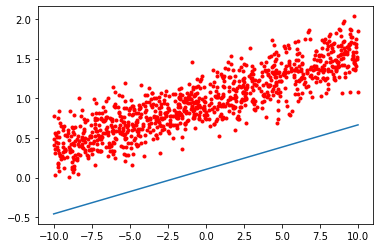

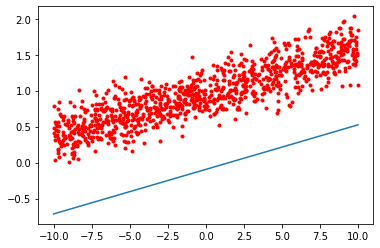

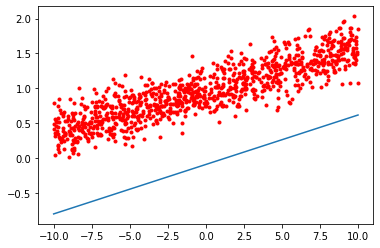

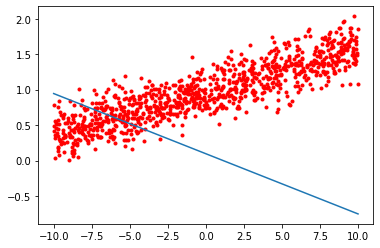

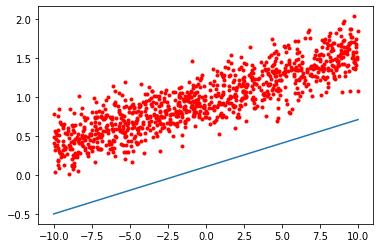

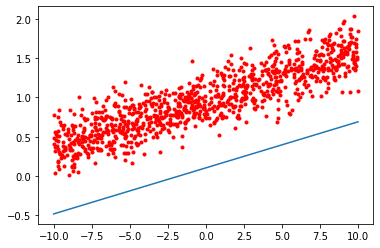

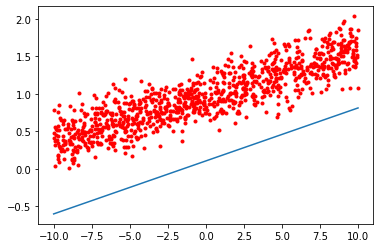

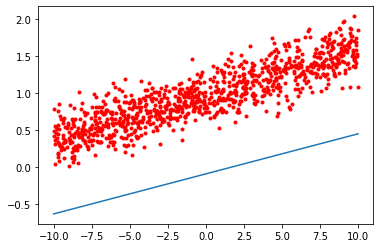

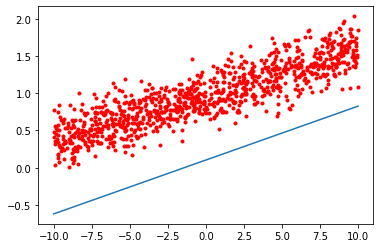

In [49]:
index = storage.add_benchmark_config(normalized=True)
for _ in range(10):
    ab, meta = normalised_mini(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)

In [50]:
print(storage.get_benchmark_results(index))

Benchmark results for config <('svd', True, <HW2.optimization.DefaultOptimization object at 0x000001530414B940>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5059750999999999
	Mean memory:0.0B
	Mean SMAPE value:0.9336145743899564



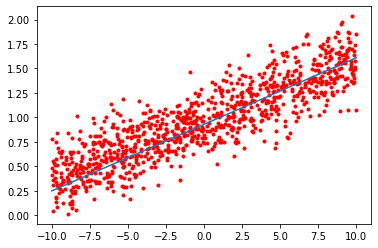

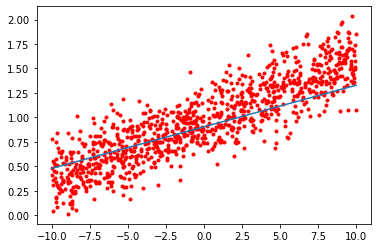

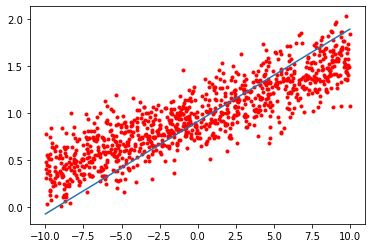

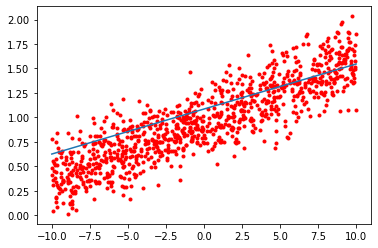

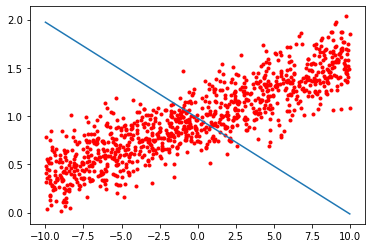

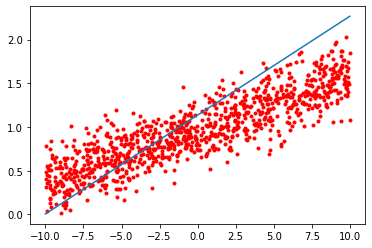

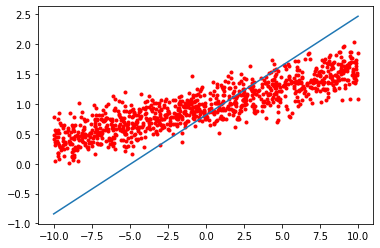

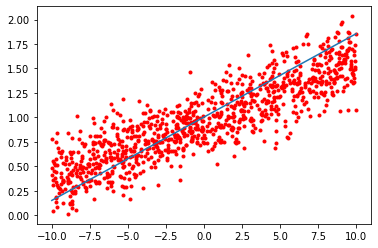

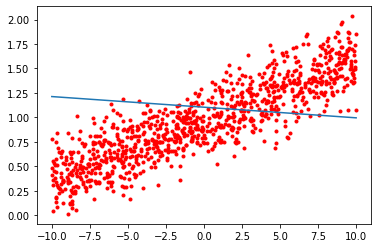

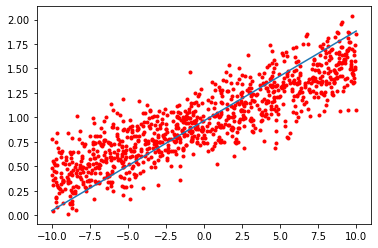

Benchmark results for config <('svd', False, <HW2.optimization.NesterovOptimization object at 0x00000153474CCFA0>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:0.5036348000000002
	Mean memory:0.0B
	Mean SMAPE value:0.20823722970470201



In [52]:
index = storage.add_benchmark_config(optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))

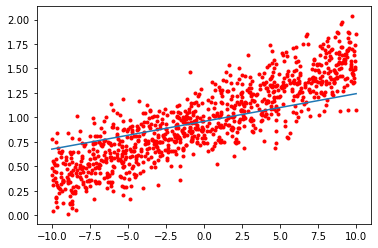

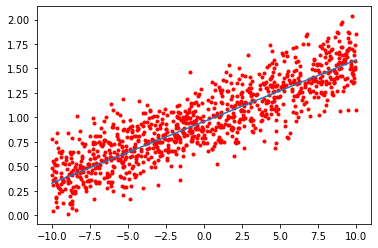

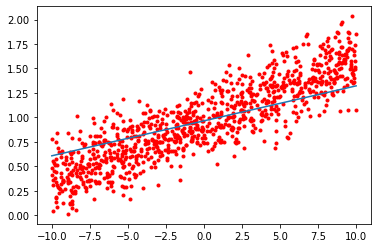

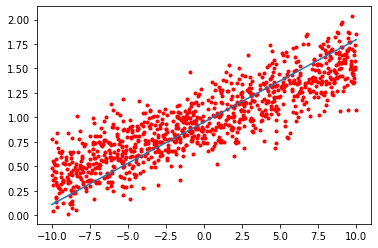

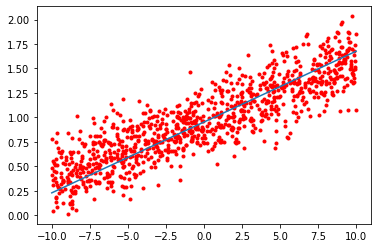

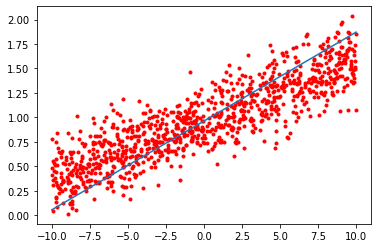

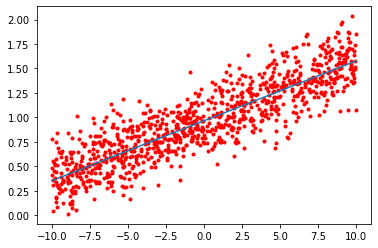

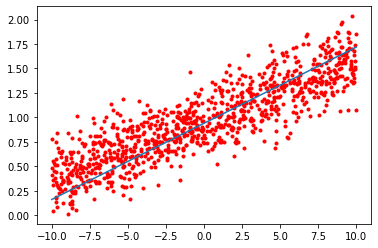

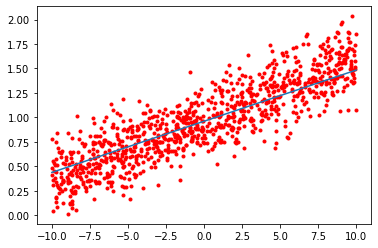

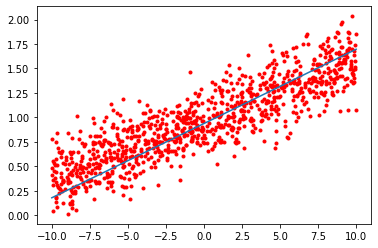

Benchmark results for config <('mini50', False, <HW2.optimization.NesterovOptimization object at 0x0000015347558F70>, <HW2.error_calculator.SquaredErrorCalculator object at 0x000001530414BB80>)>:
	Mean time:7.1312017
	Mean memory:0.0B
	Mean SMAPE value:0.11745670849134857



In [53]:
index = storage.add_benchmark_config(batch_size='mini50', optimiser=NesterovOptimization(0.5))
for _ in range(10):
    ab, meta = minibatch_gd(points, batch_size=50)
    storage.add_benchmark_result(index, meta)
    visualize_line(ab, points)
print(storage.get_benchmark_results(index))